## Importing Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",200)
pd.set_option("display.max_rows",200)

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import shap


%matplotlib inline

## Load and Explore data

In [4]:
train = pd.read_csv(r"../data/train.csv")
train.columns = [col.strip().lower() for col in train.columns]
print(f"The shape of the train data: {train.shape}")
train.sample(3)

The shape of the train data: (150000, 32)


,id,time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,amount,class
135302,135302,70817.0,-0.078593,-0.237823,-1.151749,-1.068992,2.136434,3.552215,0.563378,0.752544,-0.373438,-0.114725,-0.229823,-0.174424,-0.057920,0.075099,0.835443,0.648814,-1.153531,0.387976,-0.067286,-0.135500,0.057977,-0.216879,-0.256728,0.964256,0.726493,-0.140915,0.035505,0.010989,285.00,0
15568,15568,22906.0,1.240027,-0.275487,1.043514,-0.484923,-1.162317,-0.744705,-0.656425,-0.100165,3.092937,-1.484729,0.693530,-1.868134,1.432212,0.927353,0.559895,-0.590889,0.691401,0.298879,0.350996,-0.162465,-0.156918,0.037978,-0.024077,0.357916,0.486703,-0.720457,0.074523,0.030750,11.85,0
125437,125437,67704.0,-0.654026,0.041575,0.986916,-2.151406,1.763867,3.893918,-0.583666,1.218271,0.709927,-1.305799,-1.111816,0.128254,-0.238888,-0.683945,-0.676910,0.240178,-0.437621,-0.058261,0.085933,0.058715,-0.145557,-0.352269,-0.241467,1.038663,0.115079,0.960282,0.116689,0.115415,16.95,0


In [5]:
test = pd.read_csv(r"../data/test.csv")
test.columns = [col.strip().lower() for col in test.columns]
print(f"The shape of the test data: {test.shape}")
test.sample(3)

The shape of the test data: (69129, 31)


,id,time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,amount
15665,165665,77900,-0.919486,-0.474718,-0.073467,0.446827,2.181337,0.868649,0.632944,-0.139959,0.415850,0.216984,0.265823,-0.476612,0.691035,0.264029,-0.057961,-0.065606,0.093710,0.936710,1.125901,0.025729,0.097491,0.376737,-0.221839,0.020166,0.086478,-0.323976,-0.012902,0.069465,72.0
24732,174732,80172,0.974004,-0.163900,-0.335624,-0.750105,1.399930,1.039334,-2.304529,-1.356958,0.927663,-1.052950,0.410592,1.826554,-0.099150,-0.869256,-0.850544,-0.706424,0.066954,0.447789,0.494889,-0.014187,-0.051826,-0.003141,-0.192926,-0.526867,0.455812,-0.222616,0.077906,0.039173,102.6
57614,207614,112426,1.777866,-0.318914,0.724290,-1.645354,-0.826774,-0.924006,0.685722,-0.871739,0.306933,-1.054914,0.082668,-0.046386,0.277779,0.459569,-0.539377,-0.473713,1.576779,-0.453349,0.890979,0.440016,0.331398,0.578192,0.054159,0.353501,-0.298038,-0.143869,-0.017834,-0.015819,199.0


In [6]:
# check for missing data

data = pd.concat([train, test])

print(f'missing data in train set: {train.isnull().sum().sum()}')
print(f'missing data in test set: {test.isnull().sum().sum()}')

missing data in train set: 0
missing data in test set: 0


In [7]:
# check for duplicated data
print(f'duplicate data in train set: {train.duplicated().sum().sum()}')
print(f'duplicate data in test set: {test.duplicated().sum().sum()}')

duplicate data in train set: 0
duplicate data in test set: 0


In [8]:
# exploring train data

train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,150000.0,74999.500000,43301.414527,0.000000,37499.750000,74999.500000,112499.250000,149999.000000
time,150000.0,49785.422340,18733.655609,0.000000,39411.000000,53785.000000,63833.000000,73899.000000
feat1,150000.0,0.069456,1.346553,-22.173926,-0.844248,0.671327,1.171271,2.390816
feat2,150000.0,-0.003674,1.161502,-44.247914,-0.621724,0.003677,0.753340,16.068473
feat3,150000.0,0.739860,1.012801,-19.088980,0.181373,0.826497,1.360362,6.145578
feat4,150000.0,0.104810,1.230909,-5.069484,-0.738399,0.095342,0.967657,12.547997
feat5,150000.0,-0.254623,1.048268,-21.090735,-0.912254,-0.322525,0.242796,34.581260
feat6,150000.0,0.151934,1.182964,-25.659750,-0.590892,-0.068690,0.492931,15.082516
feat7,150000.0,-0.165443,0.802668,-31.179799,-0.667139,-0.144551,0.334553,23.256066
feat8,150000.0,0.166254,0.691267,-28.903442,-0.078114,0.125052,0.396056,18.270586


In [9]:
# exploring test data
test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,69129.0,184564.000000,19955.967716,150000.000000,167282.000000,184564.000000,201846.000000,219128.000000
time,69129.0,89700.231495,15119.656332,73899.000000,78165.000000,82812.000000,99073.000000,120580.000000
feat1,69129.0,0.153621,1.494379,-29.807725,-0.849946,-0.013829,1.292617,2.430494
feat2,69129.0,0.024798,0.706959,-19.105436,-0.444879,-0.031276,0.396541,6.867874
feat3,69129.0,-0.091934,0.885260,-22.092656,-0.594470,-0.172084,0.292818,15.878405
feat4,69129.0,0.161219,1.148045,-39.517039,-0.486516,0.123914,0.891948,13.678867
feat5,69129.0,0.271489,1.300909,-19.722872,-0.534338,0.426266,1.174539,4.241399
feat6,69129.0,-0.007837,1.296690,-5.263650,-0.829899,-0.042488,0.780126,12.268942
feat7,69129.0,0.115694,0.959655,-3.210967,-0.593737,0.069868,0.856364,5.859398
feat8,69129.0,0.040389,1.087216,-37.591259,-0.671718,-0.018824,0.613933,20.976643


## Exploring the data

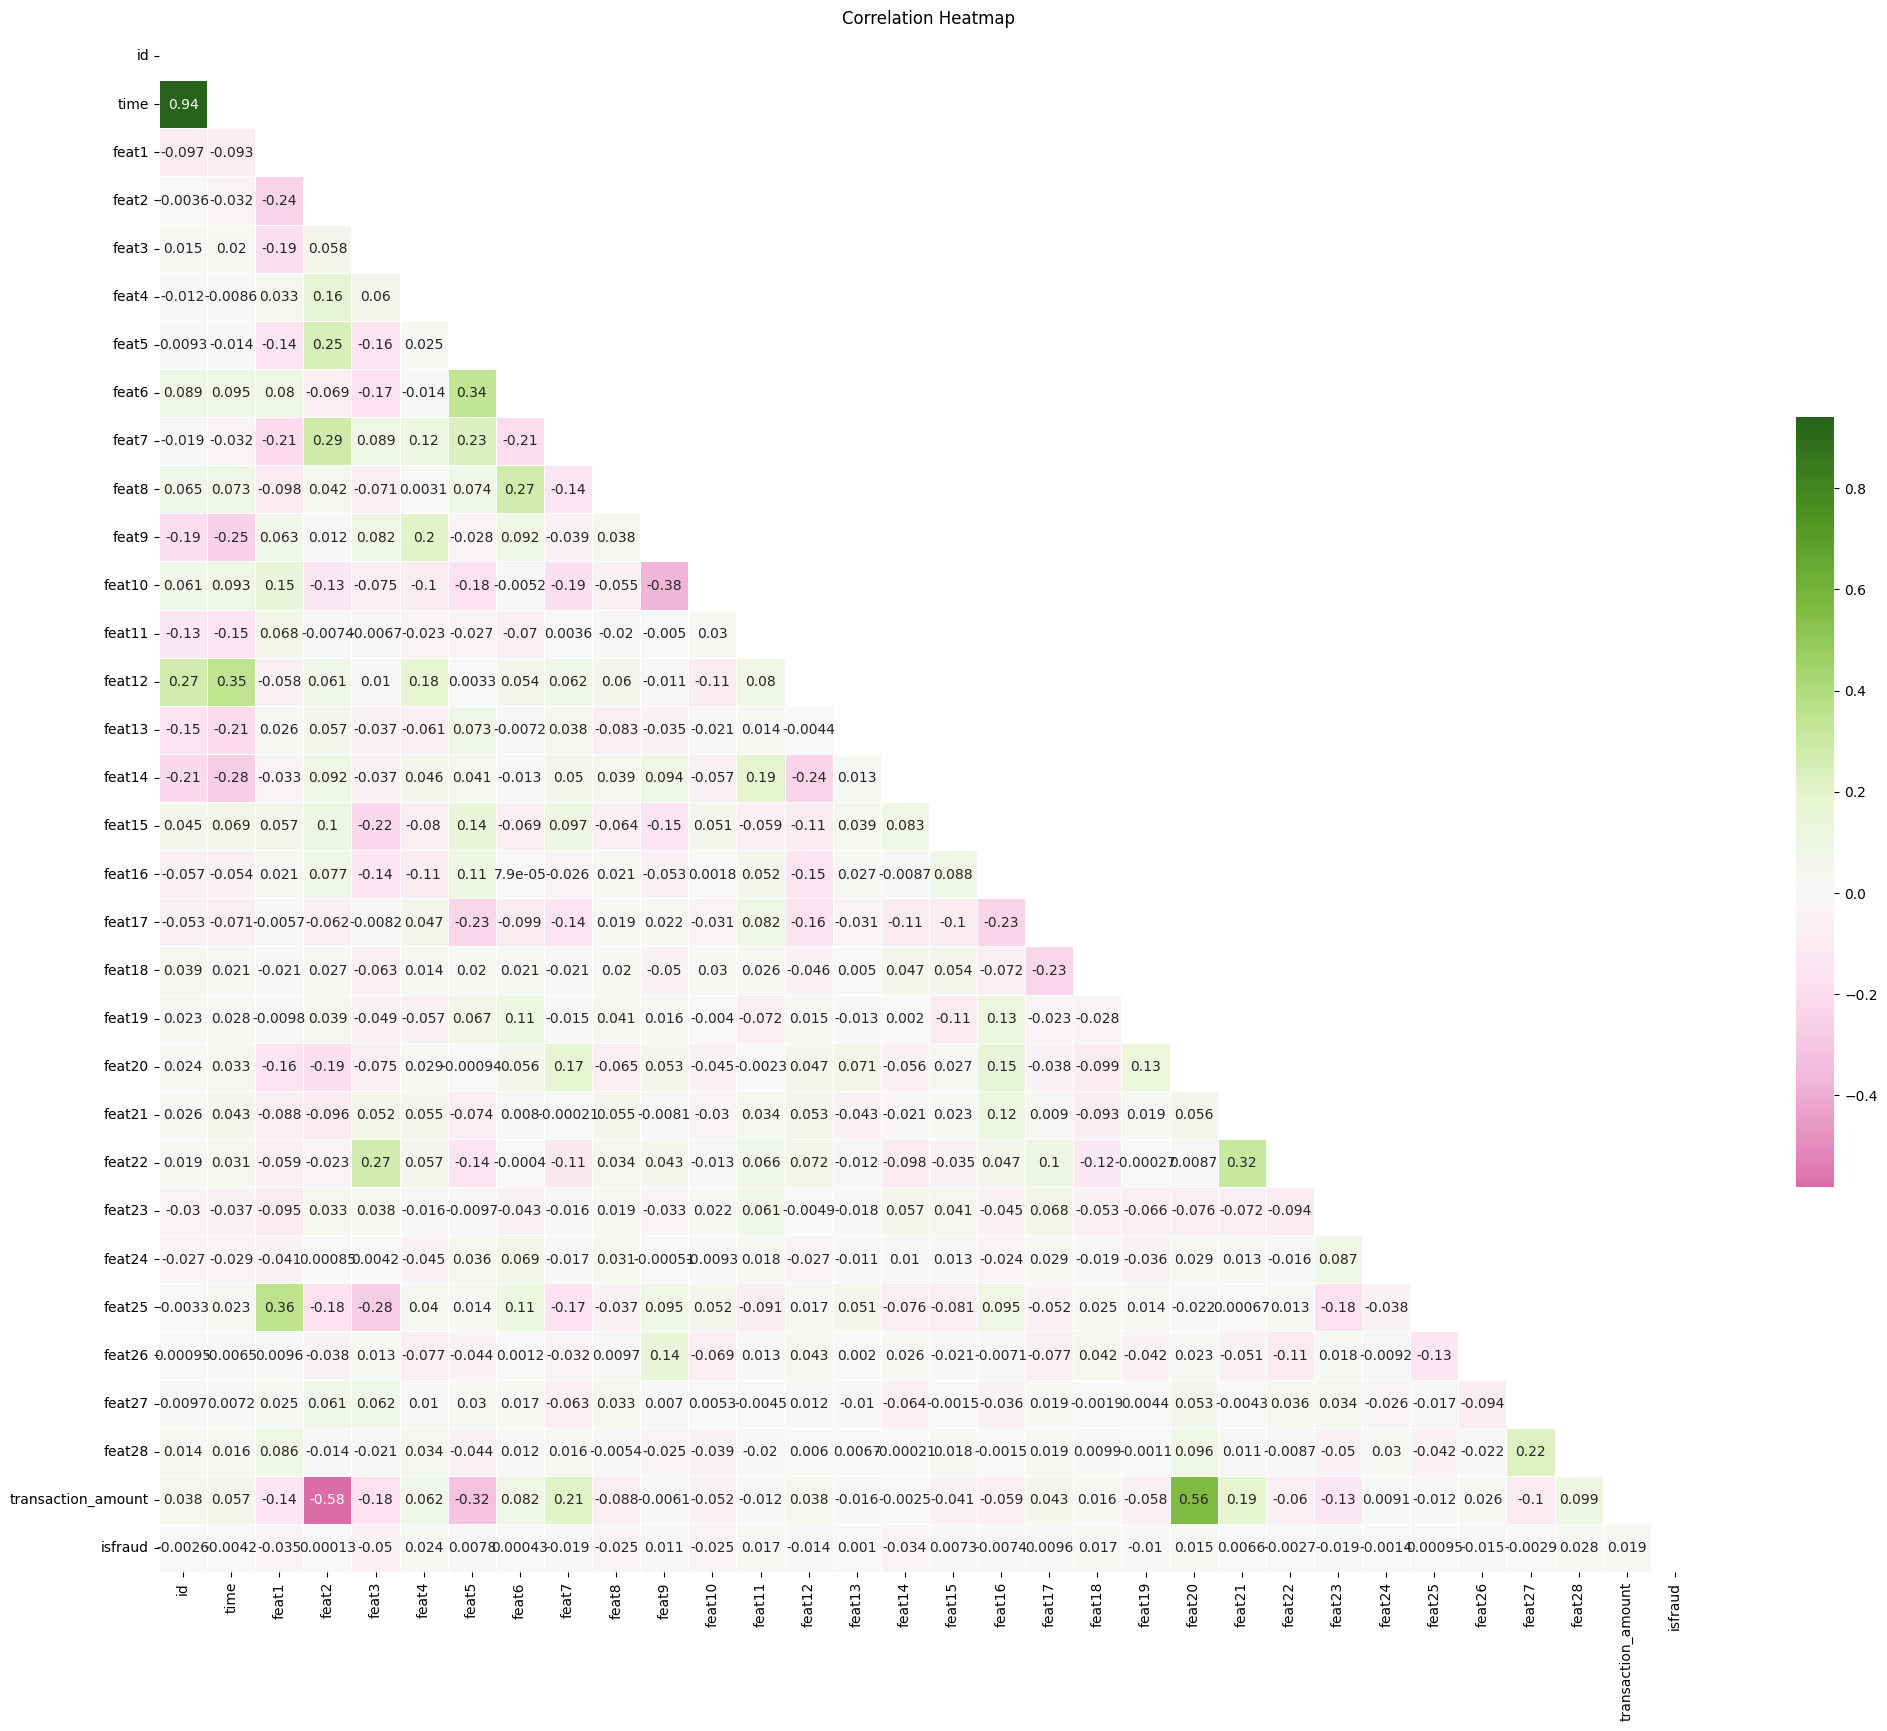

In [10]:
# heatmap to understand the correlation between the variables
plt.figure(figsize=(25, 20))
correlation_matrix = train.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(data=correlation_matrix, annot=True, cmap='PiYG', mask=mask, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap')
plt.show()

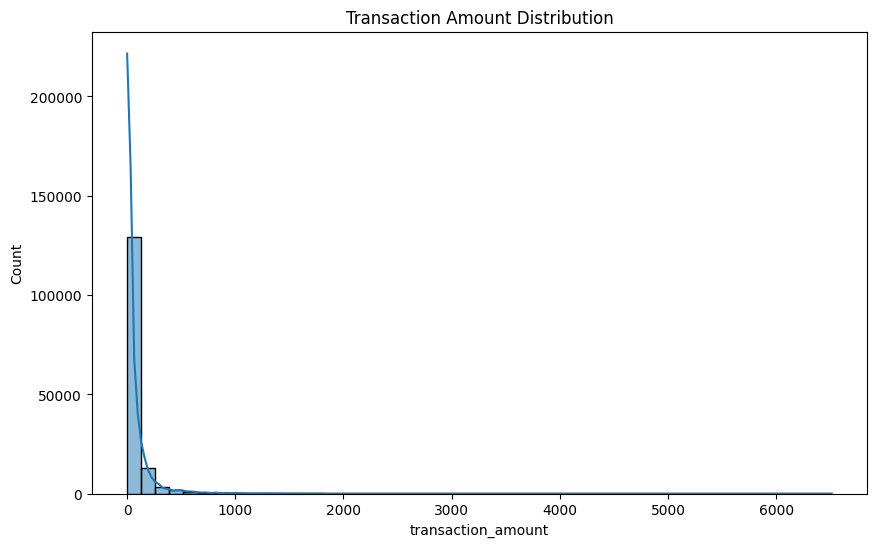

In [11]:
# Distribution of the transaction amount
plt.figure(figsize=(10, 6))
sns.histplot(train['amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

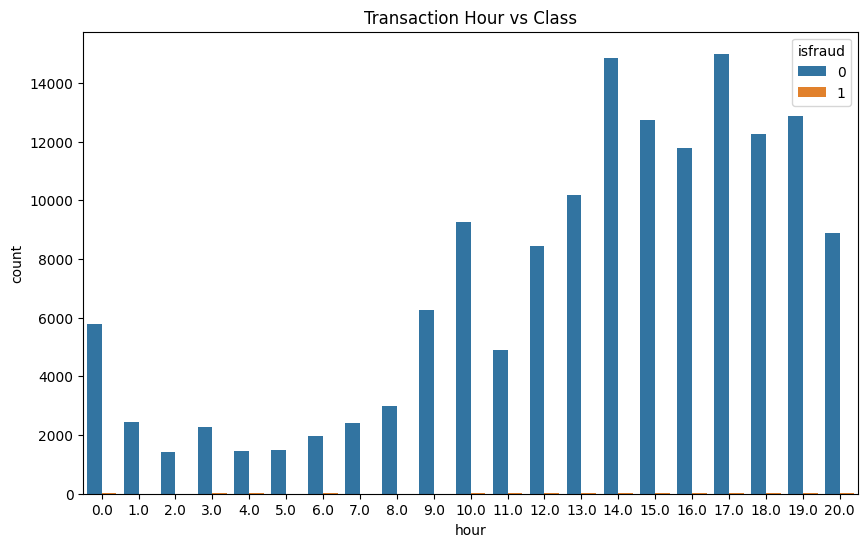

In [12]:
# creating a feature for transaction hour
sample = train.copy(deep=True)
sample['hour'] = sample['time'].apply(lambda x: divmod(x, 3600)[0] % 24)

# Visualizing the new 'hour' feature
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', hue='class', data=sample)
plt.title('Transaction Hour vs Class')
plt.show()

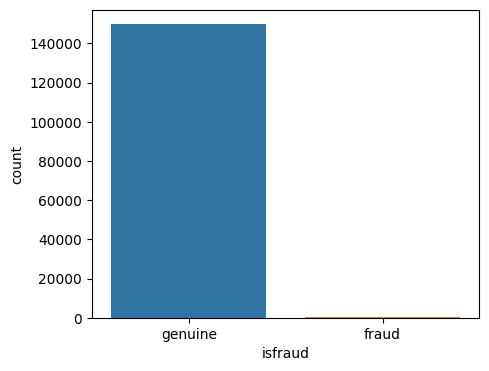

,class,count
0,genuine,149731
1,fraud,269


In [13]:
# exploring class distribution
class_df = train.class.value_counts().reset_index()
class_df.class = class_df.class.replace(1,"fraud")
class_df.class = class_df.class.replace(0,"genuine")
fig, ax = plt.subplots(figsize=(5,4))
bars = sns.barplot(class_df,x="class",y="count",hue="class")
plt.show()

class_df

## Modeling

In [15]:
# Separate features and target variable
X = train.drop('class', axis=1)
y = train['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


ROC AUC: 0.6538782153555412


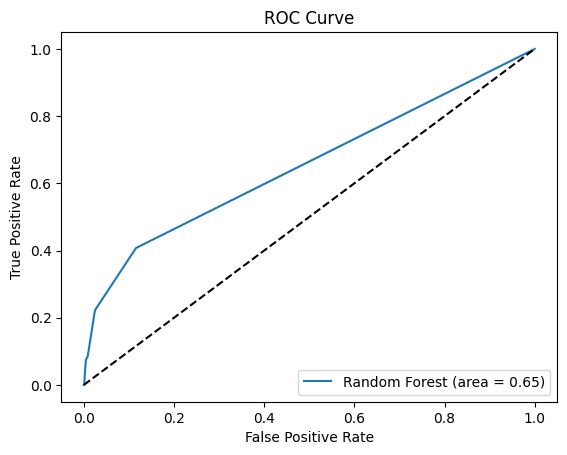

In [13]:
# Train a Random Forest classifier with class weights
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC: {roc_auc}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

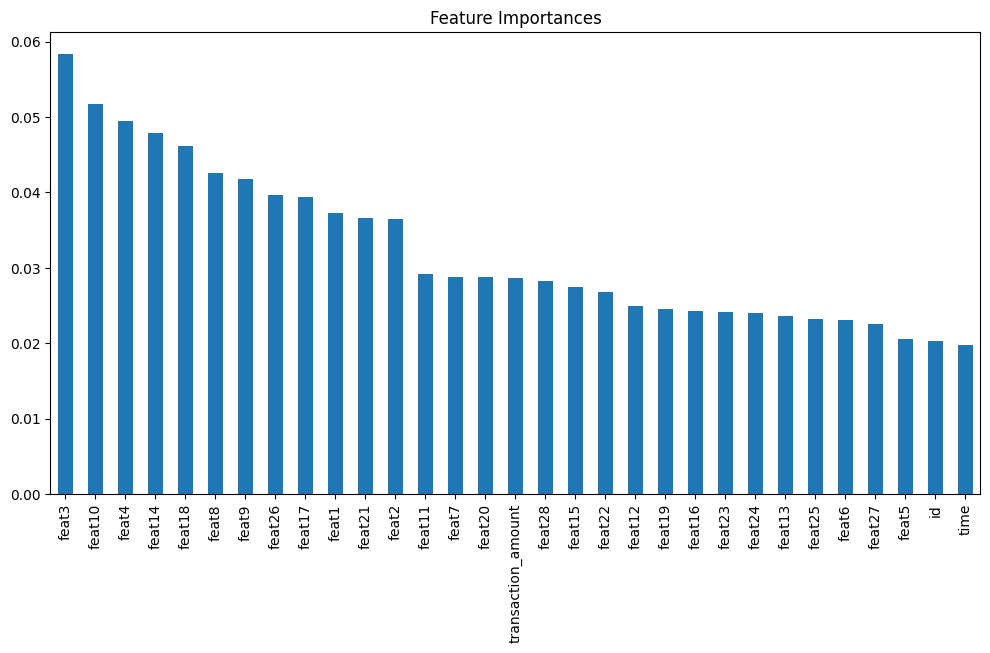

In [14]:
# Feature importance for Random Forest
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importances')
plt.show()

### Hyperparameter tuning

In [14]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Initialize a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Best estimator
best_rf = grid_search.best_estimator_


Best parameters found:  {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


ROC AUC: 0.6780435236099877


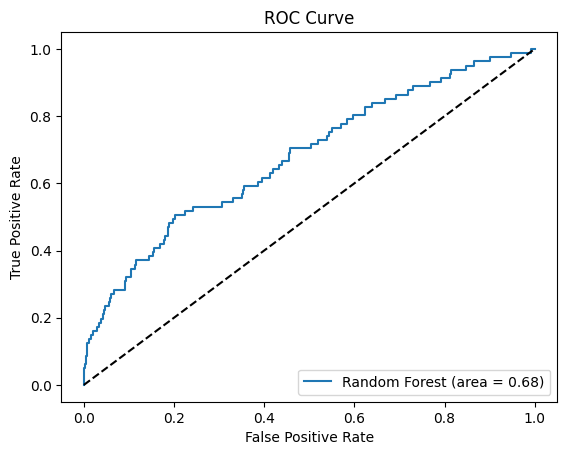

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44919
           1       0.09      0.05      0.06        81

    accuracy                           1.00     45000
   macro avg       0.54      0.52      0.53     45000
weighted avg       1.00      1.00      1.00     45000



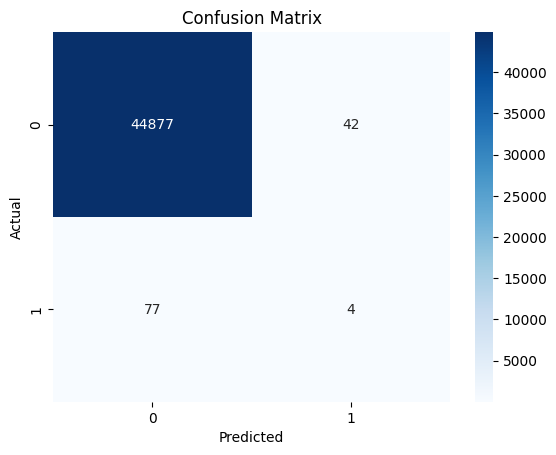

In [15]:
# Predict probabilities
y_pred_prob = best_rf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC: {roc_auc}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Predict the class labels
y_pred = best_rf.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

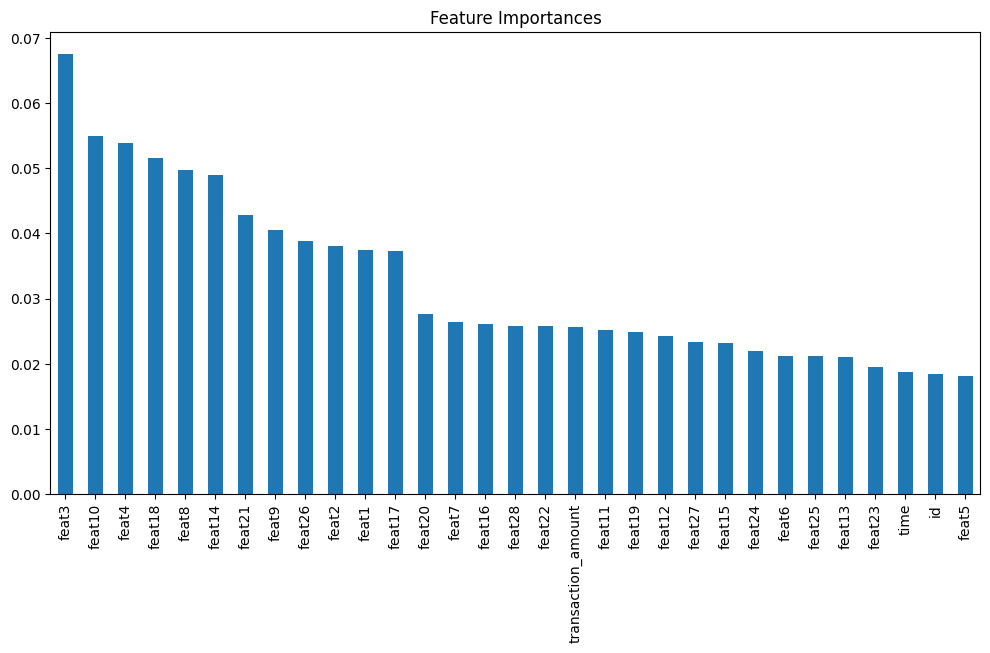

In [16]:
# Feature importance for Random Forest
feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importances')
plt.show()

## Prediction on Test

In [32]:
sample_submission = pd.read_csv(r"../data/sample_submission.csv")
sample_submission.head()

,id,IsFraud
0,150000,0.5
1,150001,0.5
2,150002,0.5
3,150003,0.5
4,150004,0.5


In [43]:
test = pd.read_csv(r"../data/test.csv")
test.columns = [col.strip().lower() for col in test.columns]

submission_prob = best_rf.predict_proba(test)[:, 1]
test['IsFraud'] = submission_prob.round(1)
submission = test[['id','IsFraud']]
submission.to_csv(r"../data/creditcard_fraud_submission.csv",index=False)

### Finding Best model

In [16]:
# Define models and parameters
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

params = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [5, 10, 15]},
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [10, 20]},
    'Gradient Boosting': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
}

# Grid Search for hyperparameter tuning
best_estimators = {}
for model_name, model in models.items():
    grid = GridSearchCV(model, params[model_name], scoring='roc_auc', cv=5)
    grid.fit(X_train, y_train)
    best_estimators[model_name] = grid.best_estimator_
    print(f'{model_name} best parameters: {grid.best_params_}')
    print(f'{model_name} best ROC AUC: {grid.best_score_}')


Logistic Regression best parameters: {'C': 0.1}
Logistic Regression best ROC AUC: 0.5456757334195151
Decision Tree best parameters: {'max_depth': 10}
Decision Tree best ROC AUC: 0.5857101118131074
Random Forest best parameters: {'max_depth': 10, 'n_estimators': 100}
Random Forest best ROC AUC: 0.7699326982298403
Gradient Boosting best parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Gradient Boosting best ROC AUC: 0.753486624876011


In [17]:
for model_name, model in best_estimators.items():
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print(f'{model_name} ROC AUC on test set: {roc_auc}')

Logistic Regression ROC AUC on test set: 0.5128900058514104
Decision Tree ROC AUC on test set: 0.6210091745388612
Random Forest ROC AUC on test set: 0.7927310310822856
Gradient Boosting ROC AUC on test set: 0.7661405069591656


Random Forest ROC AUC: 0.7927310310822856


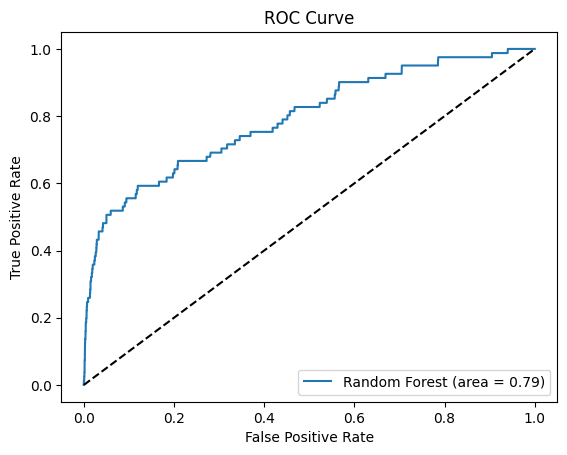

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44919
           1       0.00      0.00      0.00        81

    accuracy                           1.00     45000
   macro avg       0.50      0.50      0.50     45000
weighted avg       1.00      1.00      1.00     45000



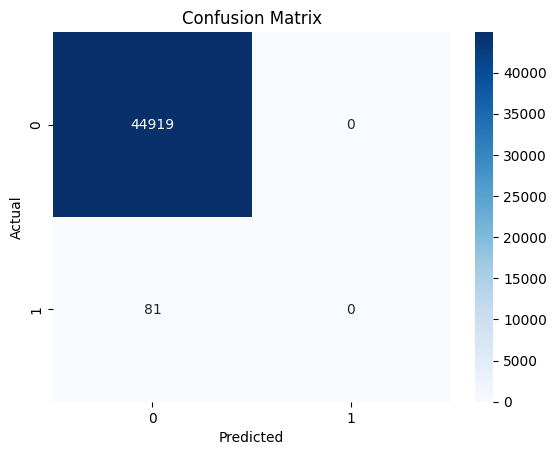

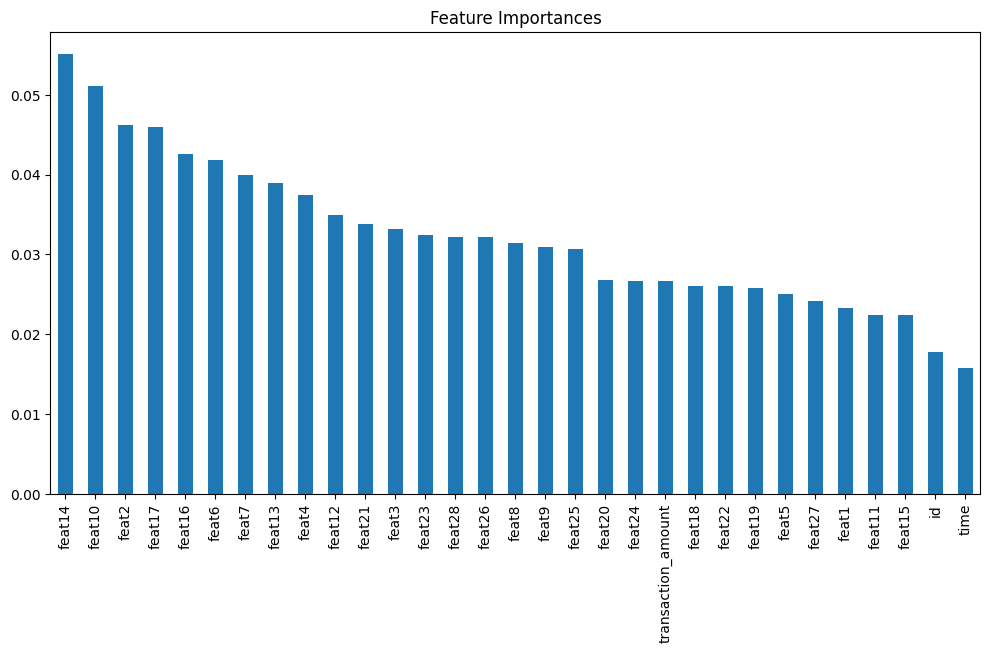

In [22]:
# Use the best Random Forest model
best_rf = best_estimators['Random Forest']

# Predict probabilities
y_pred_prob = best_rf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'Random Forest ROC AUC: {roc_auc}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Predict the class labels
y_pred = best_rf.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importances')
plt.show()

# SHAP values for model interpretation
# explainer = shap.TreeExplainer(best_rf)
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values[1], X_test, plot_type="bar")
# shap.summary_plot(shap_values[1], X_test)

### Second Iteration

In [ ]:
# TODO: 
# submission 2: RFC {'max_depth': 10, 'n_estimators': 100}
# submission 3: RFC {'class_weight': 'balanced, 'max_depth': 10, 'n_estimators': 100}

ROC AUC: 0.8131382716599069


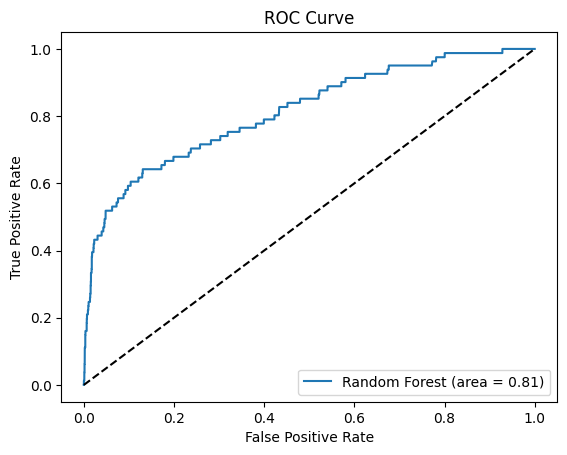

In [19]:
# Train a Random Forest classifier with class weights
clf1 = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42)
clf1.fit(X_train, y_train)

# Predict probabilities
y_pred_prob = clf1.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC: {roc_auc}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

ROC AUC: 0.6800012312972679


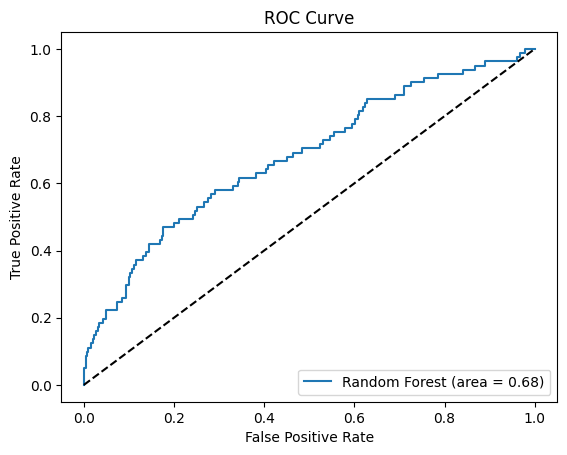

In [20]:
# Train a Random Forest classifier with class weights
clf2 = RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=100, random_state=42)
clf2.fit(X_train, y_train)

# Predict probabilities
y_pred_prob = clf2.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC: {roc_auc}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

ROC AUC: 0.6792948844270854


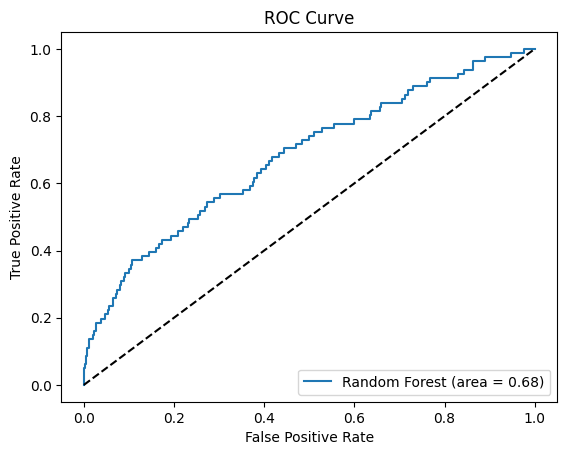

In [21]:
# Train a Random Forest classifier with class weights
clf3 = RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200, random_state=42)
clf3.fit(X_train, y_train)

# Predict probabilities
y_pred_prob = clf3.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC: {roc_auc}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [22]:
test = pd.read_csv(r"../data/test.csv")
test.columns = [col.strip().lower() for col in test.columns]

sub1 = test.copy(deep=True)
submission_prob = clf1.predict_proba(sub1)[:, 1]
sub1['IsFraud'] = submission_prob.round(1)
submission1 = sub1[['id','IsFraud']]
submission1.to_csv(r"../data/second_iteration_submission1.csv",index=False)

sub2 = test.copy(deep=True)
submission_prob = clf2.predict_proba(sub2)[:, 1]
sub2['IsFraud'] = submission_prob.round(1)
submission2 = sub2[['id','IsFraud']]
submission2.to_csv(r"../data/second_iteration_submission2.csv",index=False)

sub3 = test.copy(deep=True)
submission_prob = clf3.predict_proba(sub3)[:, 1]
sub3['IsFraud'] = submission_prob.round(1)
submission3 = sub3[['id','IsFraud']]
submission3.to_csv(r"../data/second_iteration_submission3.csv",index=False)

## Final Submission

In [24]:
train = pd.read_csv(r"../data/train.csv")
train.columns = [col.strip().lower() for col in train.columns]
print(f"The shape of the train data: {train.shape}")

The shape of the train data: (170883, 32)


In [26]:
test = pd.read_csv(r"../data/test.csv")
test.columns = [col.strip().lower() for col in test.columns]

In [25]:
# Separate features and target variable
X = train.drop('class', axis=1)
y = train['class']

In [27]:
# Train a Random Forest classifier with class weights
clf1 = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42)
clf1.fit(X, y)

# Predict probabilities
sub1 = test.copy(deep=True)
submission_prob = clf1.predict_proba(sub1)[:, 1]
sub1['Class'] = submission_prob.round(2)
submission1 = sub1[['id','Class']]
submission1.to_csv(r"../data/second_iteration_submission1.csv",index=False)

In [29]:
# Train a Random Forest classifier with class weights
clf2 = RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=100, random_state=42)
clf2.fit(X, y)

# Predict probabilities
sub2 = test.copy(deep=True)
submission_prob = clf2.predict_proba(sub2)[:, 1]
sub2['Class'] = submission_prob.round(2)
submission2 = sub2[['id','Class']]
submission2.to_csv(r"../data/second_iteration_submission2.csv",index=False)

In [30]:
# Train a Random Forest classifier with class weights
clf3 = RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200, random_state=42)
clf3.fit(X, y)

# Predict probabilities
sub3 = test.copy(deep=True)
submission_prob = clf3.predict_proba(sub3)[:, 1]
sub3['Class'] = submission_prob.round(2)
submission3 = sub3[['id','Class']]
submission3.to_csv(r"../data/second_iteration_submission3.csv",index=False)